In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl

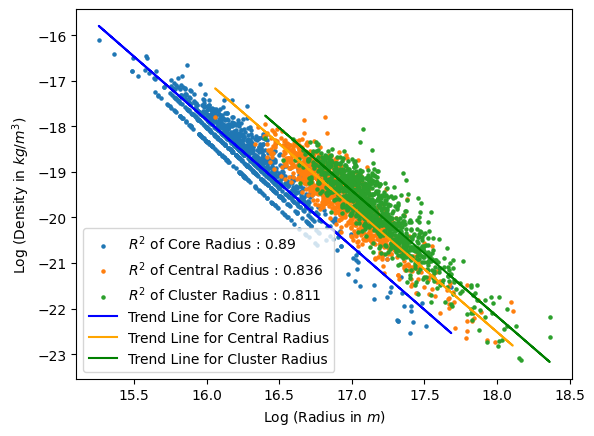

R^2 of core radius:0.89
R^2 of central radius:0.836
R^2 of cluster radius:0.811


In [ ]:
df = pd.read_csv("../work/HSRA Research Sheets - Star Clusters.csv")
df.rename(columns = {'core_radius (degrees)':'radius_core', 'central_radius (degrees)':'radius_cent', 'cluster_radius (degrees)':'radius_clust', 'distance (PC)':'distance'}, inplace = True)

df['distance'] = 3.0857e16 * df.distance

df['radius_core'] = (np.radians(df.radius_core) * df.distance)
df['radius_cent'] = (np.radians(df.radius_cent) * df.distance)
df['radius_clust'] = (np.radians(df.radius_clust) * df.distance)

df['volume_core'] = (4/3) * math.pi * ((df.radius_core)**3)
df['volume_cent'] = (4/3) * math.pi * ((df.radius_cent)**3)
df['volume_clust'] = (4/3) * math.pi * ((df.radius_clust)**3)


df['density_core'] = (df.num_core_stars * 1.9885e30/ df.volume_core)
df = df[df.density_core != 0]
df['density_core'] = np.log10(df.density_core)
df['density_cent'] = np.log10(df.num_central_stars * 1.9885e30/ df.volume_cent)
df['density_clust'] = np.log10(df.num_cluster_stars * 1.9885e30/ df.volume_clust)

df['radius_core'] = np.log10(df.radius_core)
df['radius_cent'] = np.log10(df.radius_cent)
df['radius_clust'] = np.log10(df.radius_clust)

mpl.scatter(df['radius_core'], df['density_core'], s=5)
mpl.scatter(df['radius_cent'], df['density_cent'], s=5)
mpl.scatter(df['radius_clust'], df['density_clust'], s=5)
mpl.xlabel('Log (Radius in $m$)')
mpl.ylabel('Log (Density in $kg/m^3$)')
z1 = np.polyfit(df['radius_core'], df['density_core'], 1)
p1 = np.poly1d(z1)
z2 = np.polyfit(df['radius_cent'], df['density_cent'], 1)
p2 = np.poly1d(z2)
z3 = np.polyfit(df['radius_clust'], df['density_clust'], 1)
p3 = np.poly1d(z3)

yp1 = p1(df['radius_core'])
ym1 = np.mean(df['density_core'])
sst1 = np.sum((df['density_core'] - ym1)**2)
ssr1 = np.sum((df['density_core'] - yp1)**2)
r2_1 = round(1 - (ssr1/sst1), 3)

yp2 = p2(df['radius_cent'])
ym2 = np.mean(df['density_cent'])
sst2 = np.sum((df['density_cent'] - ym2)**2)
ssr2 = np.sum((df['density_cent'] - yp2)**2)
r2_2 = round(1 - (ssr2/sst2), 3)

yp3 = p3(df['radius_clust'])
ym3 = np.mean(df['density_clust'])
sst3 = np.sum((df['density_clust'] - ym3)**2)
ssr3 = np.sum((df['density_clust'] - yp3)**2)
r2_3 = round(1 - (ssr3/sst3), 3)

mpl.plot(df['radius_core'], p1(df['radius_core']), color = 'blue', label = 'Lin Reg Trend 1')
mpl.plot(df['radius_cent'], p2(df['radius_cent']), color = 'orange', label = 'Lin Reg Trend 2')
mpl.plot(df['radius_clust'], p3(df['radius_clust']), color = 'green', label = 'Lin Reg Trend 3')

mpl.legend(["$R^2$ of Core Radius : " +str(r2_1), "$R^2$ of Central Radius : " +str(r2_2), "$R^2$ of Cluster Radius : " +str(r2_3), "Trend Line for Core Radius", "Trend Line for Central Radius", "Trend Line for Cluster Radius"])

mpl.show()

print("R^2 of core radius:" + str(r2_1))
print("R^2 of central radius:" + str(r2_2))
print("R^2 of cluster radius:" + str(r2_3))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fdc13804-8e9e-42b5-b07c-64788a4e4ff3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>